In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
# Se crean funciones para facilitar la importación de datasets a lo largo de todo el estudio

def csv_a_DF(id_dataset,encoding,separador = ','):
    ruta = 'C:\\Users\\sergio\\Desktop\\repos\\datasets rural\\codificados\\'
    extension = '.csv'
    return pd.read_csv(ruta + id_dataset + extension, sep=separador, encoding=encoding, index_col=False)

def xlsx_a_DF(id_dataset):
    ruta = 'C:\\Users\\sergio\\Desktop\\repos\\datasets rural\\codificados\\'
    extension = '.xlsx'
    return pd.read_excel(ruta + id_dataset + extension, sheet_name='datos')

1) **Importación de CSVs hacia DFs** para su exploración inicial. El objetivo es generar un gráfico comparativo sobre la evolución de las existencias de cada tipo de ganado, en los años alcanzados por los datasets:

In [86]:
# Creación de DataFrames de existencias por región, por ganado, anuales, alcance nacional, 2008 a 2019, creados por SENASA:

ex_bovinas_region = csv_a_DF('27','Latin-1')
ex_equinas_region = csv_a_DF('48','Latin-1')
ex_caprinas_region = csv_a_DF('46','Latin-1',';')
ex_ovinas_region = csv_a_DF('54','Latin-1')
ex_porcinas_region = csv_a_DF('58','Latin-1')

2) Se realiza **primer chequeo de cada DFs** para identificar los campos que incluyen y detectar datos faltantes (nulos) para posteriormente realizar limpieza de datos, si corresponde. También se agregara columna de totales en caso necesario.

In [87]:
ex_bovinas_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5864 entries, 0 to 5863
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anio             5864 non-null   int64  
 1   provincia        5864 non-null   object 
 2   provincia_id     5864 non-null   int64  
 3   departamento     5864 non-null   object 
 4   departamento_id  5864 non-null   int64  
 5   vacas            5832 non-null   float64
 6   vaquillonas      5811 non-null   float64
 7   novillos         5695 non-null   float64
 8   novillitos       5707 non-null   float64
 9   terneros         5784 non-null   float64
 10  terneras         5786 non-null   float64
 11  toros            5799 non-null   float64
 12  toritos          2343 non-null   float64
 13  bueyes           2152 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 641.5+ KB


In [88]:
ex_bovinas_region.describe()

,anio,provincia_id,departamento_id,vacas,vaquillonas,novillos,novillitos,terneros,terneras,toros,toritos,bueyes
count,5864.000000,5864.000000,5864.00000,5832.000000,5811.000000,5695.000000,5707.000000,5784.000000,5786.000000,5799.000000,2343.000000,2152.000000
mean,2013.514325,37.944748,38105.82691,45983.200617,15623.639993,7151.044074,8936.538111,13707.912863,14212.776184,2271.317124,437.041827,154.978625
std,3.453025,28.704515,28602.94471,61433.207597,21871.688910,14188.259682,14920.754867,18432.296669,19358.019944,2901.320143,701.549510,436.451391
min,2008.000000,2.000000,2000.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2011.000000,6.000000,6882.00000,4523.750000,1603.500000,481.000000,677.000000,1135.000000,1217.250000,343.000000,17.000000,3.000000
50%,2014.000000,30.000000,30105.00000,19906.000000,6769.000000,1876.000000,3170.000000,5779.000000,5876.500000,1117.000000,139.000000,13.000000
75%,2017.000000,62.000000,62077.00000,63060.500000,21525.500000,7171.000000,11031.000000,19352.750000,20077.000000,3187.500000,574.000000,69.250000
max,2019.000000,94.000000,94015.00000,451748.000000,223827.000000,209041.000000,202067.000000,130113.000000,133662.000000,20596.000000,7225.000000,5215.000000


In [89]:
ex_bovinas_region

,anio,provincia,provincia_id,departamento,departamento_id,vacas,vaquillonas,novillos,novillitos,terneros,terneras,toros,toritos,bueyes
0,2008,Buenos Aires,6,Adolfo Alsina,6007,95188.0,32850.0,34436.0,30635.0,37568.0,35323.0,4679.0,NaN,NaN
1,2009,Buenos Aires,6,Adolfo Alsina,6007,90476.0,27249.0,30725.0,30221.0,36100.0,33981.0,4153.0,NaN,NaN
2,2010,Buenos Aires,6,Adolfo Alsina,6007,73728.0,23288.0,24469.0,24146.0,26042.0,25452.0,3517.0,NaN,NaN
3,2011,Buenos Aires,6,Adolfo Alsina,6007,71648.0,30229.0,18630.0,21725.0,26302.0,25316.0,3358.0,NaN,1.0
4,2012,Buenos Aires,6,Adolfo Alsina,6007,81254.0,30784.0,19297.0,18887.0,30677.0,28833.0,3519.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5859,2015,Tucumán,90,Yerba Buena,90119,412.0,122.0,21.0,23.0,98.0,94.0,33.0,8.0,9.0
5860,2016,Tucumán,90,Yerba Buena,90119,417.0,117.0,16.0,28.0,139.0,94.0,31.0,14.0,9.0
5861,2017,Tucumán,90,Yerba Buena,90119,472.0,65.0,29.0,12.0,134.0,110.0,30.0,13.0,9.0
5862,2018,Tucumán,90,Yerba Buena,90119,437.0,58.0,32.0,13.0,54.0,22.0,28.0,9.0,9.0


In [90]:
# Se agrega columna de total de existencias bovinas sumando el ganado en todas las fases de producción

ex_bovinas_region['total_bovinos'] = ex_bovinas_region.iloc[:, 5:].sum(axis=1).astype(int)

In [91]:
ex_equinas_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6050 entries, 0 to 6049
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   anio                 6050 non-null   int64  
 1   provincia            6050 non-null   object 
 2   provincia_id         6050 non-null   int64  
 3   departamento         6050 non-null   object 
 4   departamento_id      6050 non-null   int64  
 5   padrillos            5702 non-null   float64
 6   caballos             6011 non-null   float64
 7   yeguas               5986 non-null   float64
 8   potrillos_potrillas  5745 non-null   float64
 9   mulas                4280 non-null   float64
 10  burros_asnos         4071 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 520.1+ KB


In [92]:
ex_equinas_region.describe()

,anio,provincia_id,departamento_id,padrillos,caballos,yeguas,potrillos_potrillas,mulas,burros_asnos
count,6050.000000,6050.000000,6050.000000,5702.000000,6011.000000,5986.000000,5745.000000,4280.000000,4071.000000
mean,2013.511736,37.658182,37822.551074,146.216591,1993.090002,1814.041931,513.892254,108.145561,161.528617
std,3.451184,28.642457,28537.494625,485.318792,2306.541440,2140.635296,701.059778,205.430568,1570.587400
min,2008.000000,2.000000,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2011.000000,6.000000,6847.000000,21.000000,516.000000,411.000000,59.000000,7.000000,5.000000
50%,2014.000000,30.000000,30105.000000,62.000000,1336.000000,1157.000000,243.000000,27.000000,17.000000
75%,2017.000000,62.000000,62070.000000,152.000000,2592.500000,2370.750000,681.000000,98.000000,64.000000
max,2019.000000,94.000000,94015.000000,28273.000000,21507.000000,15030.000000,6163.000000,1789.000000,96589.000000


In [93]:
ex_equinas_region

,anio,provincia,provincia_id,departamento,departamento_id,padrillos,caballos,yeguas,potrillos_potrillas,mulas,burros_asnos
0,2008,Buenos Aires,6,Adolfo Alsina,6007,153.0,1838.0,1453.0,218.0,NaN,14.0
1,2009,Buenos Aires,6,Adolfo Alsina,6007,127.0,1608.0,1457.0,190.0,NaN,NaN
2,2010,Buenos Aires,6,Adolfo Alsina,6007,141.0,1699.0,1704.0,240.0,NaN,NaN
3,2011,Buenos Aires,6,Adolfo Alsina,6007,144.0,1703.0,1708.0,341.0,NaN,NaN
4,2012,Buenos Aires,6,Adolfo Alsina,6007,127.0,1742.0,1812.0,434.0,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6045,2015,Tucumán,90,Yerba Buena,90119,25.0,59.0,106.0,31.0,13.0,NaN
6046,2016,Tucumán,90,Yerba Buena,90119,34.0,79.0,121.0,31.0,13.0,NaN
6047,2017,Tucumán,90,Yerba Buena,90119,38.0,90.0,147.0,35.0,13.0,NaN
6048,2018,Tucumán,90,Yerba Buena,90119,43.0,101.0,173.0,36.0,13.0,NaN


In [94]:
# Se agrega columna de total de existencias equinas sumando el ganado en todas las fases de producción

ex_equinas_region['total_equinos'] = ex_equinas_region.iloc[:, 5:].sum(axis=1).astype(int)

In [95]:
ex_caprinas_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5695 entries, 0 to 5694
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anio                     5695 non-null   int64  
 1   provincia                5695 non-null   object 
 2   provincia_id             5695 non-null   int64  
 3   partido_departamento     5695 non-null   object 
 4   partido_departamento_id  5695 non-null   int64  
 5   chivos                   5604 non-null   float64
 6   cabras                   5393 non-null   float64
 7   cabritos                 4500 non-null   float64
 8   capones                  2618 non-null   float64
 9   cabrillas_chivitos       3195 non-null   float64
 10  total_caprinos           5695 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 489.5+ KB


In [96]:
# Se modifican los nombres de las columna de indice 3 y 4 para que sean iguales a los otros dataset:

ex_caprinas_region = ex_caprinas_region.rename(columns={'partido_departamento': 'departamento'})
ex_caprinas_region = ex_caprinas_region.rename(columns={'partido_departamento_id': 'departamento_id'})

In [97]:
ex_caprinas_region.describe()

,anio,provincia_id,departamento_id,chivos,cabras,cabritos,capones,cabrillas_chivitos,total_caprinos
count,5695.000000,5695.000000,5695.000000,5604.000000,5393.000000,4500.000000,2618.000000,3195.000000,5695.000000
mean,2013.559789,37.800527,156.190342,2256.223769,4670.667347,1429.094667,271.631016,989.289828,8146.960667
std,3.446857,28.010527,197.453093,8813.431890,16288.670683,6472.974643,1084.065236,4375.913627,28625.102279
min,2008.000000,2.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2011.000000,10.000000,42.000000,49.000000,102.000000,32.000000,6.000000,16.000000,189.000000
50%,2014.000000,34.000000,84.000000,258.000000,492.000000,191.000000,37.000000,79.000000,928.000000
75%,2017.000000,62.000000,147.000000,1334.500000,2964.000000,754.250000,161.000000,357.500000,5657.000000
max,2019.000000,90.000000,882.000000,308347.000000,342728.000000,185003.000000,20195.000000,61763.000000,675894.000000


In [98]:
ex_caprinas_region.head(10)

,anio,provincia,provincia_id,departamento,departamento_id,chivos,cabras,cabritos,capones,cabrillas_chivitos,total_caprinos
0,2008,Buenos Aires,6,Adolfo Alsina,7,59.0,173.0,14.0,NaN,NaN,246
1,2009,Buenos Aires,6,Adolfo Alsina,7,41.0,145.0,6.0,NaN,NaN,192
2,2010,Buenos Aires,6,Adolfo Alsina,7,47.0,24.0,NaN,NaN,NaN,71
3,2011,Buenos Aires,6,Adolfo Alsina,7,52.0,159.0,33.0,NaN,NaN,244
4,2012,Buenos Aires,6,Adolfo Alsina,7,54.0,218.0,80.0,NaN,NaN,352
5,2013,Buenos Aires,6,Adolfo Alsina,7,60.0,224.0,50.0,NaN,NaN,334
6,2014,Buenos Aires,6,Adolfo Alsina,7,48.0,269.0,50.0,NaN,NaN,367
7,2015,Buenos Aires,6,Adolfo Alsina,7,48.0,250.0,52.0,NaN,NaN,350
8,2016,Buenos Aires,6,Adolfo Alsina,7,42.0,221.0,72.0,NaN,NaN,335
9,2017,Buenos Aires,6,Adolfo Alsina,7,74.0,281.0,72.0,NaN,8.0,435


In [99]:
ex_ovinas_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795 entries, 0 to 5794
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anio                   5795 non-null   int64  
 1   provincia              5795 non-null   object 
 2   provincia_id           5795 non-null   int64  
 3   departamento           5795 non-null   object 
 4   departamento_id        5656 non-null   float64
 5   carneros_cbz           5721 non-null   float64
 6   ovejas_cbz             5768 non-null   float64
 7   borregos_cbz           5297 non-null   float64
 8   capones_cbz            4899 non-null   float64
 9   corderos_corderas_cbz  5458 non-null   float64
 10  Unnamed: 10            0 non-null      float64
 11  Unnamed: 11            0 non-null      float64
 12  Unnamed: 12            0 non-null      float64
dtypes: float64(9), int64(2), object(2)
memory usage: 588.7+ KB


In [100]:
# Se eliminan las 3 últimas columnas, ya que no contienen valores

columnas_drop_ov = ['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']

ex_ovinas_region = ex_ovinas_region.drop(columns = columnas_drop_ov)

In [101]:
# Se agrega columna de total de existencias ovinas sumando el ganado en todas las fases de producción

ex_ovinas_region['total_ovinos'] = ex_ovinas_region.iloc[:, 5:].sum(axis=1).astype(int)

In [102]:
ex_ovinas_region.head(10)

,anio,provincia,provincia_id,departamento,departamento_id,carneros_cbz,ovejas_cbz,borregos_cbz,capones_cbz,corderos_corderas_cbz,total_ovinos
0,2008,Buenos Aires,6,Adolfo Alsina,6007.0,696.0,13238.0,868.0,195.0,1460.0,16457
1,2009,Buenos Aires,6,Adolfo Alsina,6007.0,721.0,11593.0,981.0,175.0,1615.0,15085
2,2010,Buenos Aires,6,Adolfo Alsina,6007.0,619.0,11016.0,860.0,236.0,1045.0,13776
3,2011,Buenos Aires,6,Adolfo Alsina,6007.0,670.0,10633.0,849.0,282.0,1671.0,14105
4,2012,Buenos Aires,6,Adolfo Alsina,6007.0,871.0,11617.0,1182.0,296.0,2019.0,15985
5,2013,Buenos Aires,6,Adolfo Alsina,6007.0,836.0,11951.0,1752.0,371.0,2858.0,17768
6,2014,Buenos Aires,6,Adolfo Alsina,6007.0,856.0,12504.0,1537.0,351.0,2941.0,18189
7,2015,Buenos Aires,6,Adolfo Alsina,6007.0,814.0,12268.0,1635.0,351.0,3026.0,18094
8,2016,Buenos Aires,6,Adolfo Alsina,6007.0,759.0,11743.0,1746.0,306.0,3512.0,18066
9,2017,Buenos Aires,6,Adolfo Alsina,6007.0,739.0,11733.0,1782.0,306.0,3504.0,18064


In [103]:
ex_porcinas_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5738 entries, 0 to 5737
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   anio                            5738 non-null   int64  
 1   provinicia                      5738 non-null   object 
 2   provinicia_id                   5738 non-null   int64  
 3   departamento                    5738 non-null   object 
 4   departamento_id                 5738 non-null   int64  
 5   padrillos                       5652 non-null   float64
 6   cerda                           5704 non-null   float64
 7   lechon                          5525 non-null   float64
 8   capones                         5188 non-null   float64
 9   cachorro                        5147 non-null   float64
 10  machos_enteros_inmunocastrados  1194 non-null   float64
 11  cachorra                        2317 non-null   float64
 12  Unnamed: 12                     0 

In [104]:
# Se corrigen los nombres de las columna de indice 1 y 2:

ex_porcinas_region = ex_porcinas_region.rename(columns={'provinicia': 'provincia'})
ex_porcinas_region = ex_porcinas_region.rename(columns={'provinicia_id': 'provincia_id'})

In [105]:
# Se eliminan las 3 últimas columnas, ya que no contienen valores

columnas_drop_por = ['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']

ex_porcinas_region = ex_porcinas_region.drop(columns = columnas_drop_por)

In [106]:
# Se agrega columna de total de existencias porcinas sumando el ganado en todas las fases de producción

ex_porcinas_region['total_porcinos'] = ex_porcinas_region.iloc[:, 5:].sum(axis=1).astype(int)

In [107]:
ex_porcinas_region

,anio,provincia,provincia_id,departamento,departamento_id,padrillos,cerda,lechon,capones,cachorro,machos_enteros_inmunocastrados,cachorra,total_porcinos
0,2008,Buenos Aires,6,Adolfo Alsina,6007,302.0,1919.0,1390.0,1474.0,1174.0,NaN,NaN,6259
1,2009,Buenos Aires,6,Adolfo Alsina,6007,291.0,1624.0,1842.0,1047.0,1134.0,NaN,NaN,5938
2,2010,Buenos Aires,6,Adolfo Alsina,6007,269.0,1857.0,1827.0,1118.0,994.0,NaN,NaN,6065
3,2011,Buenos Aires,6,Adolfo Alsina,6007,289.0,2099.0,2414.0,1132.0,951.0,NaN,NaN,6885
4,2012,Buenos Aires,6,Adolfo Alsina,6007,383.0,2611.0,3603.0,1770.0,1637.0,54.0,NaN,10058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,2015,Tucumán,90,Yerba Buena,90119,14.0,76.0,77.0,50.0,67.0,NaN,NaN,284
5734,2016,Tucumán,90,Yerba Buena,90119,4.0,32.0,83.0,50.0,17.0,NaN,17.0,203
5735,2017,Tucumán,90,Yerba Buena,90119,4.0,32.0,83.0,50.0,17.0,NaN,17.0,203
5736,2018,Tucumán,90,Yerba Buena,90119,6.0,32.0,83.0,50.0,17.0,NaN,23.0,211


3. A continuación se generaran nuevos dataframes derivados de los anteriores, con los cuales se trabajará de la siguiente manera:
 
 a. Se eliminarán las columnas 'provincia_id', 'departamento' y 'departamento_id' y todas las relacionadas a las existencias en las distintas fases de producción, dejando unicamente las columnas 'anio', provincia' y 'total (ganado).

 b. Se agregará una nueva columna a cada dataframe indicando la región a la que pertence cada provincia (Pampeana, Cuyo, Patagonia, Noreste o Noroeste), y se eliminará la columna 'provincia', ya que no será necesaria a partir de este punto.

 c. Se agrupara por la columna 'anio' y 'region', de forma de obtener 5 filas por año en cada dataframe, indicando cada una el total de existencias de dicho año en cada región del país.

 d. Como último paso antes de generar los gráficos, se separará cada dataframe correspondiente a cada tipo de ganado en sub-dataframes para cada región en específico, para luego poder generar los distintos gráficos y superponerlos en una comparación evolutiva.

In [108]:
columnas_drop_r1 = ['provincia_id', 'departamento', 'departamento_id']

ex_porcinas_region_r1 = ex_porcinas_region.drop(columns = columnas_drop_r1)
ex_bovinas_region_r1 = ex_bovinas_region.drop(columns = columnas_drop_r1)
ex_equinas_region_r1 = ex_equinas_region.drop(columns = columnas_drop_r1)
ex_caprinas_region_r1 = ex_caprinas_region.drop(columns = columnas_drop_r1)
ex_ovinas_region_r1 = ex_ovinas_region.drop(columns = columnas_drop_r1)

In [109]:
# Se crean nuevos dataframes

columnas_drop_r2p = ['padrillos','cerda','lechon','capones','cachorro','machos_enteros_inmunocastrados','cachorra']
columnas_drop_r2b = ['vacas','vaquillonas','novillos','novillitos','terneros','terneras','toros','toritos','bueyes']
columnas_drop_r2e = ['padrillos','caballos','yeguas','potrillos_potrillas','mulas','burros_asnos']
columnas_drop_r2c = ['chivos',	'cabras', 'cabritos', 'capones', 'cabrillas_chivitos']
columnas_drop_r2o = ['carneros_cbz', 'ovejas_cbz', 'borregos_cbz', 'capones_cbz', 'corderos_corderas_cbz']

ex_porcinas_region_r2 = ex_porcinas_region_r1.drop(columns = columnas_drop_r2p)
ex_bovinas_region_r2 = ex_bovinas_region_r1.drop(columns = columnas_drop_r2b)
ex_equinas_region_r2 = ex_equinas_region_r1.drop(columns = columnas_drop_r2e)
ex_caprinas_region_r2 = ex_caprinas_region_r1.drop(columns = columnas_drop_r2c)
ex_ovinas_region_r2 = ex_ovinas_region_r1.drop(columns = columnas_drop_r2o)

In [110]:
# Se procede a la creación de las columnas referidas a las regiones del país en cada dataframe creado en el paso anterior

# Regiones:
Pampeana = ['Santa Fe', 'Entre Ríos', 'Entre Rios', 'La Pampa', 'Córdoba', 'Cordoba', 'Buenos Aires']
Cuyo = ['Mendoza', 'San Juan', 'San Luis']
Patagonia = ['Chubut', 'Neuquén','Neuquen',  'Río Negro', 'Rio Negro','Santa Cruz', 'Tierra del Fuego']
Noreste = ['Formosa', 'Chaco', 'Corrientes', 'Misiones']
Noroeste = ['Jujuy', 'Salta', 'Tucumán', 'Tucuman', 'Catamarca', 'La Rioja', 'Santiago del Estero']

In [111]:
ex_porcinas_region_r2['region'] = ex_porcinas_region_r2['provincia'].apply(lambda x: 'Pampeana' if x in(Pampeana) else (
                                                                      'Cuyo' if x in(Cuyo) else (
                                                                        'Patagonia' if x in(Patagonia) else (
                                                                            'Noreste' if x in(Noreste) else (
                                                                                'Noroeste' if x in(Noroeste) else ' ')))))

ex_bovinas_region_r2['region'] = ex_bovinas_region_r2['provincia'].apply(lambda x: 'Pampeana' if x in(Pampeana) else (
                                                                      'Cuyo' if x in(Cuyo) else (
                                                                        'Patagonia' if x in(Patagonia) else (
                                                                            'Noreste' if x in(Noreste) else (
                                                                                'Noroeste' if x in(Noroeste) else ' ')))))

ex_equinas_region_r2['region'] = ex_equinas_region_r2['provincia'].apply(lambda x: 'Pampeana' if x in(Pampeana) else (
                                                                      'Cuyo' if x in(Cuyo) else (
                                                                        'Patagonia' if x in(Patagonia) else (
                                                                            'Noreste' if x in(Noreste) else (
                                                                                'Noroeste' if x in(Noroeste) else ' ')))))

ex_caprinas_region_r2['region'] = ex_caprinas_region_r2['provincia'].apply(lambda x: 'Pampeana' if x in(Pampeana) else (
                                                                      'Cuyo' if x in(Cuyo) else (
                                                                        'Patagonia' if x in(Patagonia) else (
                                                                            'Noreste' if x in(Noreste) else (
                                                                                'Noroeste' if x in(Noroeste) else ' ')))))

ex_ovinas_region_r2['region'] = ex_ovinas_region_r2['provincia'].apply(lambda x: 'Pampeana' if x in(Pampeana) else (
                                                                      'Cuyo' if x in(Cuyo) else (
                                                                        'Patagonia' if x in(Patagonia) else (
                                                                            'Noreste' if x in(Noreste) else (
                                                                                'Noroeste' if x in(Noroeste) else ' ')))))


In [112]:
ex_bovinas_region_r2

,anio,provincia,total_bovinos,region
0,2008,Buenos Aires,270679,Pampeana
1,2009,Buenos Aires,252905,Pampeana
2,2010,Buenos Aires,200642,Pampeana
3,2011,Buenos Aires,197209,Pampeana
4,2012,Buenos Aires,213251,Pampeana
...,...,...,...,...
5859,2015,Tucumán,820,Noroeste
5860,2016,Tucumán,865,Noroeste
5861,2017,Tucumán,874,Noroeste
5862,2018,Tucumán,662,Noroeste


In [113]:
ex_porcinas_region_r2 = ex_porcinas_region_r2.drop(columns = 'provincia')
ex_bovinas_region_r2 = ex_bovinas_region_r2.drop(columns = 'provincia')
ex_equinas_region_r2 = ex_equinas_region_r2.drop(columns = 'provincia')
ex_caprinas_region_r2 = ex_caprinas_region_r2.drop(columns = 'provincia')
ex_ovinas_region_r2 = ex_ovinas_region_r2.drop(columns = 'provincia')

In [114]:
ex_porcinas_region_r2

,anio,total_porcinos,region
0,2008,6259,Pampeana
1,2009,5938,Pampeana
2,2010,6065,Pampeana
3,2011,6885,Pampeana
4,2012,10058,Pampeana
...,...,...,...
5733,2015,284,Noroeste
5734,2016,203,Noroeste
5735,2017,203,Noroeste
5736,2018,211,Noroeste


In [115]:
# A continuación, se agrupa la información de cada dataframe según el año ('anio') 

ex_porcinas_region_r2 = ex_porcinas_region_r2.groupby(['anio','region'], as_index=False)['total_porcinos'].sum()
ex_bovinas_region_r2 = ex_bovinas_region_r2.groupby(['anio','region'], as_index=False)['total_bovinos'].sum()
ex_equinas_region_r2 = ex_equinas_region_r2.groupby(['anio','region'], as_index=False)['total_equinos'].sum()
ex_caprinas_region_r2 = ex_caprinas_region_r2.groupby(['anio','region'], as_index=False)['total_caprinos'].sum()
ex_ovinas_region_r2 = ex_ovinas_region_r2.groupby(['anio','region'], as_index=False)['total_ovinos'].sum()

In [116]:
# Se subdividen los dataframes según región

porcinos_pampeana = ex_porcinas_region_r2[ex_porcinas_region_r2['region'] == 'Pampeana'].reset_index(drop=True)
porcinos_cuyo = ex_porcinas_region_r2[ex_porcinas_region_r2['region'] == 'Cuyo'].reset_index(drop=True)
porcinos_patagonia = ex_porcinas_region_r2[ex_porcinas_region_r2['region'] == 'Patagonia'].reset_index(drop=True)
porcinos_noroeste = ex_porcinas_region_r2[ex_porcinas_region_r2['region'] == 'Noroeste'].reset_index(drop=True)
porcinos_noreste = ex_porcinas_region_r2[ex_porcinas_region_r2['region'] == 'Noreste'].reset_index(drop=True)

bovinos_pampeana = ex_bovinas_region_r2[ex_bovinas_region_r2['region'] == 'Pampeana'].reset_index(drop=True)
bovinos_cuyo = ex_bovinas_region_r2[ex_bovinas_region_r2['region'] == 'Cuyo'].reset_index(drop=True)
bovinos_patagonia = ex_bovinas_region_r2[ex_bovinas_region_r2['region'] == 'Patagonia'].reset_index(drop=True)
bovinos_noroeste = ex_bovinas_region_r2[ex_bovinas_region_r2['region'] == 'Noroeste'].reset_index(drop=True)
bovinos_noreste = ex_bovinas_region_r2[ex_bovinas_region_r2['region'] == 'Noreste'].reset_index(drop=True)

equinos_pampeana = ex_equinas_region_r2[ex_equinas_region_r2['region'] == 'Pampeana'].reset_index(drop=True)
equinos_cuyo = ex_equinas_region_r2[ex_equinas_region_r2['region'] == 'Cuyo'].reset_index(drop=True)
equinos_patagonia = ex_equinas_region_r2[ex_equinas_region_r2['region'] == 'Patagonia'].reset_index(drop=True)
equinos_noroeste = ex_equinas_region_r2[ex_equinas_region_r2['region'] == 'Noroeste'].reset_index(drop=True)
equinos_noreste = ex_equinas_region_r2[ex_equinas_region_r2['region'] == 'Noreste'].reset_index(drop=True)

caprinos_pampeana = ex_caprinas_region_r2[ex_caprinas_region_r2['region'] == 'Pampeana'].reset_index(drop=True)
caprinos_cuyo = ex_caprinas_region_r2[ex_caprinas_region_r2['region'] == 'Cuyo'].reset_index(drop=True)
caprinos_patagonia = ex_caprinas_region_r2[ex_caprinas_region_r2['region'] == 'Patagonia'].reset_index(drop=True)
caprinos_noroeste = ex_caprinas_region_r2[ex_caprinas_region_r2['region'] == 'Noroeste'].reset_index(drop=True)
caprinos_noreste = ex_caprinas_region_r2[ex_caprinas_region_r2['region'] == 'Noreste'].reset_index(drop=True)

ovinos_pampeana = ex_ovinas_region_r2[ex_ovinas_region_r2['region'] == 'Pampeana'].reset_index(drop=True)
ovinos_cuyo = ex_ovinas_region_r2[ex_ovinas_region_r2['region'] == 'Cuyo'].reset_index(drop=True)
ovinos_patagonia = ex_ovinas_region_r2[ex_ovinas_region_r2['region'] == 'Patagonia'].reset_index(drop=True)
ovinos_noroeste = ex_ovinas_region_r2[ex_ovinas_region_r2['region'] == 'Noroeste'].reset_index(drop=True)
ovinos_noreste = ex_ovinas_region_r2[ex_ovinas_region_r2['region'] == 'Noreste'].reset_index(drop=True)

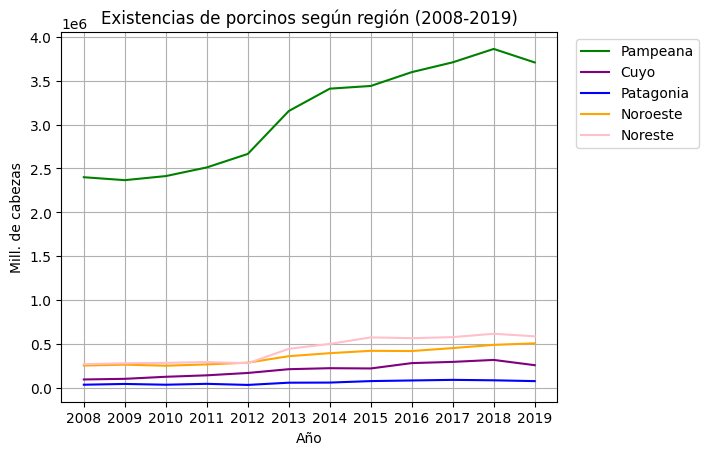

In [117]:
plt.plot(porcinos_pampeana['anio'], porcinos_pampeana['total_porcinos'], color='green', label='Pampeana')
plt.plot(porcinos_cuyo['anio'], porcinos_cuyo['total_porcinos'], color='purple', label='Cuyo')
plt.plot(porcinos_patagonia['anio'], porcinos_patagonia['total_porcinos'], color='blue', label='Patagonia')
plt.plot(porcinos_noroeste['anio'], porcinos_noroeste['total_porcinos'], color='orange', label='Noroeste')
plt.plot(porcinos_noreste['anio'], porcinos_noreste['total_porcinos'], color='pink', label='Noreste')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Mill. de cabezas')
plt.title('Existencias de porcinos según región (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_porc_region - fig 3.1.jpg', bbox_inches='tight')
plt.show()

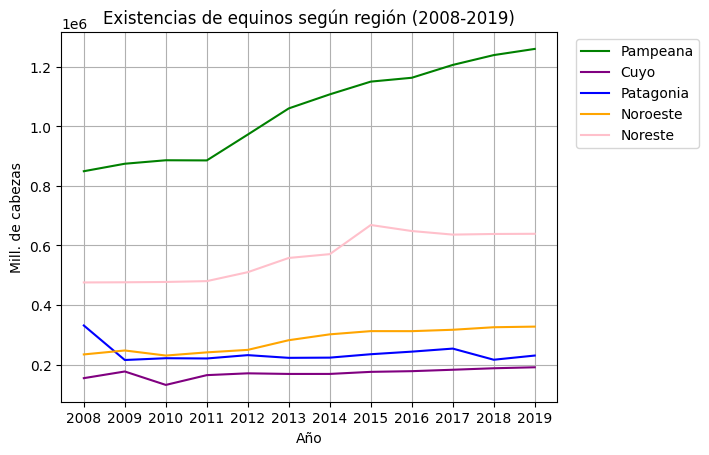

In [118]:
plt.plot(equinos_pampeana['anio'], equinos_pampeana['total_equinos'], color='green', label='Pampeana')
plt.plot(equinos_cuyo['anio'], equinos_cuyo['total_equinos'], color='purple', label='Cuyo')
plt.plot(equinos_patagonia['anio'], equinos_patagonia['total_equinos'], color='blue', label='Patagonia')
plt.plot(equinos_noroeste['anio'], equinos_noroeste['total_equinos'], color='orange', label='Noroeste')
plt.plot(equinos_noreste['anio'], equinos_noreste['total_equinos'], color='pink', label='Noreste')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Mill. de cabezas')
plt.title('Existencias de equinos según región (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_eq_region - fig 3.2.jpg', bbox_inches='tight')
plt.show()

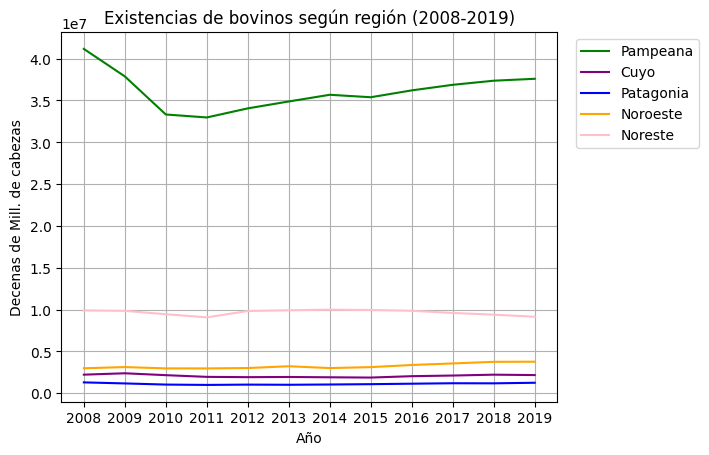

In [119]:
plt.plot(bovinos_pampeana['anio'], bovinos_pampeana['total_bovinos'], color='green', label='Pampeana')
plt.plot(bovinos_cuyo['anio'], bovinos_cuyo['total_bovinos'], color='purple', label='Cuyo')
plt.plot(bovinos_patagonia['anio'], bovinos_patagonia['total_bovinos'], color='blue', label='Patagonia')
plt.plot(bovinos_noroeste['anio'], bovinos_noroeste['total_bovinos'], color='orange', label='Noroeste')
plt.plot(bovinos_noreste['anio'], bovinos_noreste['total_bovinos'], color='pink', label='Noreste')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Decenas de Mill. de cabezas')
plt.title('Existencias de bovinos según región (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_bov_region - fig 3.3.jpg', bbox_inches='tight')
plt.show()

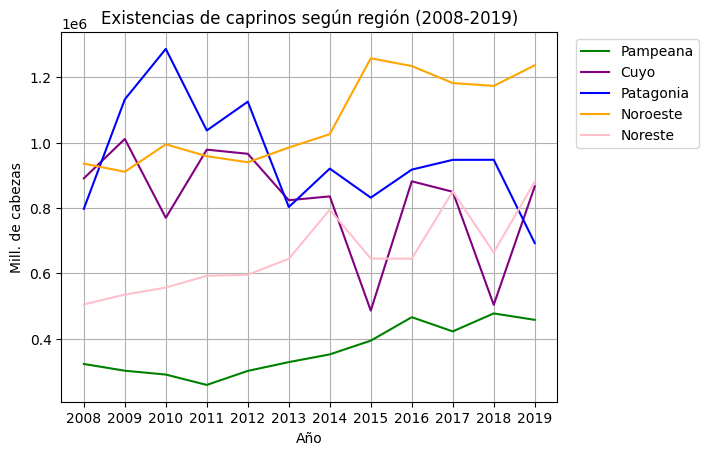

In [120]:
plt.plot(caprinos_pampeana['anio'], caprinos_pampeana['total_caprinos'], color='green', label='Pampeana')
plt.plot(caprinos_cuyo['anio'], caprinos_cuyo['total_caprinos'], color='purple', label='Cuyo')
plt.plot(caprinos_patagonia['anio'], caprinos_patagonia['total_caprinos'], color='blue', label='Patagonia')
plt.plot(caprinos_noroeste['anio'], caprinos_noroeste['total_caprinos'], color='orange', label='Noroeste')
plt.plot(caprinos_noreste['anio'], caprinos_noreste['total_caprinos'], color='pink', label='Noreste')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Mill. de cabezas')
plt.title('Existencias de caprinos según región (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_cap_region - fig 3.4.jpg', bbox_inches='tight')
plt.show()

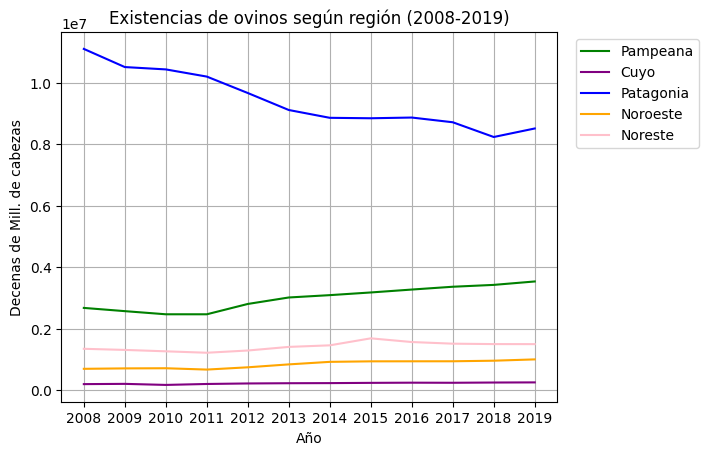

In [121]:
plt.plot(ovinos_pampeana['anio'], ovinos_pampeana['total_ovinos'], color='green', label='Pampeana')
plt.plot(ovinos_cuyo['anio'], ovinos_cuyo['total_ovinos'], color='purple', label='Cuyo')
plt.plot(ovinos_patagonia['anio'], ovinos_patagonia['total_ovinos'], color='blue', label='Patagonia')
plt.plot(ovinos_noroeste['anio'], ovinos_noroeste['total_ovinos'], color='orange', label='Noroeste')
plt.plot(ovinos_noreste['anio'], ovinos_noreste['total_ovinos'], color='pink', label='Noreste')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Decenas de Mill. de cabezas')
plt.title('Existencias de ovinos según región (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_ov_region - fig 3.5.jpg', bbox_inches='tight')
plt.show()

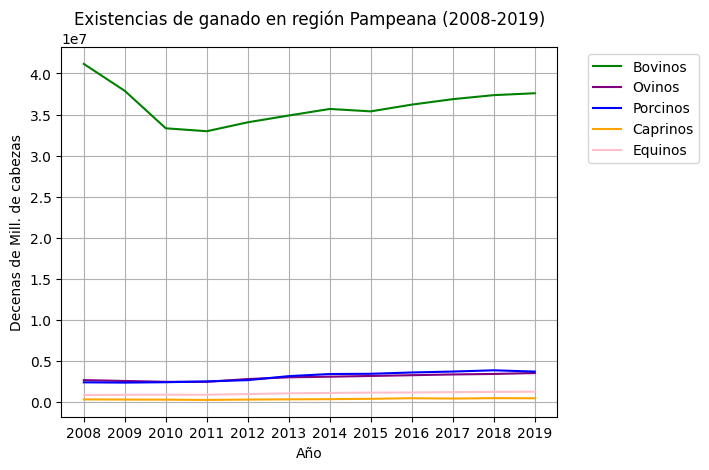

In [122]:
plt.plot(bovinos_pampeana['anio'], bovinos_pampeana['total_bovinos'], color='green', label='Bovinos')
plt.plot(ovinos_pampeana['anio'], ovinos_pampeana['total_ovinos'], color='purple', label='Ovinos')
plt.plot(porcinos_pampeana['anio'], porcinos_pampeana['total_porcinos'], color='blue', label='Porcinos')
plt.plot(caprinos_pampeana['anio'], caprinos_pampeana['total_caprinos'], color='orange', label='Caprinos')
plt.plot(equinos_pampeana['anio'], equinos_pampeana['total_equinos'], color='pink', label='Equinos')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Decenas de Mill. de cabezas')
plt.title('Existencias de ganado en región Pampeana (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_pampeana - fig 4.1.jpg', bbox_inches='tight')
plt.show()

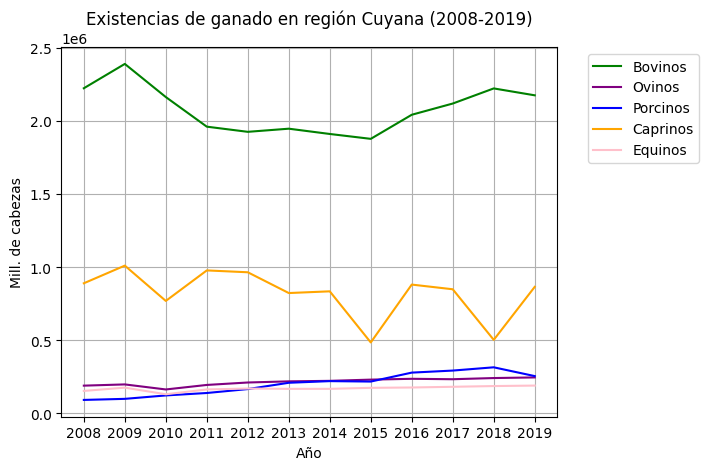

In [123]:
plt.plot(bovinos_cuyo['anio'], bovinos_cuyo['total_bovinos'], color='green', label='Bovinos')
plt.plot(ovinos_cuyo['anio'], ovinos_cuyo['total_ovinos'], color='purple', label='Ovinos')
plt.plot(porcinos_cuyo['anio'], porcinos_cuyo['total_porcinos'], color='blue', label='Porcinos')
plt.plot(caprinos_cuyo['anio'], caprinos_cuyo['total_caprinos'], color='orange', label='Caprinos')
plt.plot(equinos_cuyo['anio'], equinos_cuyo['total_equinos'], color='pink', label='Equinos')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Mill. de cabezas')
plt.title('Existencias de ganado en región Cuyana (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_cuyo - fig 4.2.jpg', bbox_inches='tight')
plt.show()

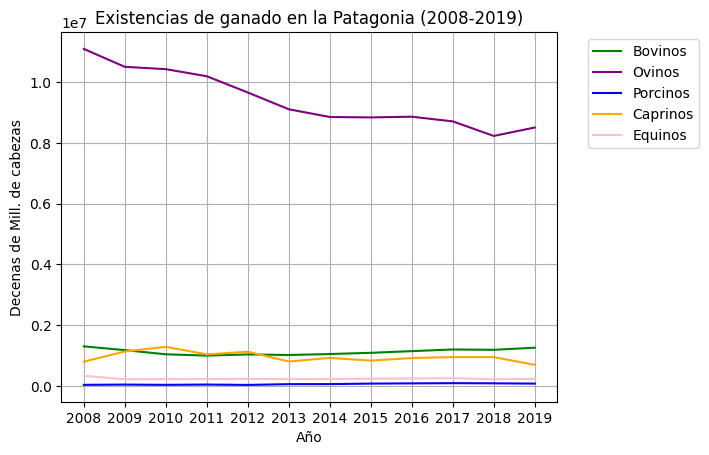

In [124]:
plt.plot(bovinos_patagonia['anio'], bovinos_patagonia['total_bovinos'], color='green', label='Bovinos')
plt.plot(ovinos_patagonia['anio'], ovinos_patagonia['total_ovinos'], color='purple', label='Ovinos')
plt.plot(porcinos_patagonia['anio'], porcinos_patagonia['total_porcinos'], color='blue', label='Porcinos')
plt.plot(caprinos_patagonia['anio'], caprinos_patagonia['total_caprinos'], color='orange', label='Caprinos')
plt.plot(equinos_patagonia['anio'], equinos_patagonia['total_equinos'], color='pink', label='Equinos')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Decenas de Mill. de cabezas')
plt.title('Existencias de ganado en la Patagonia (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_patagonia - fig 4.3.jpg', bbox_inches='tight')
plt.show()

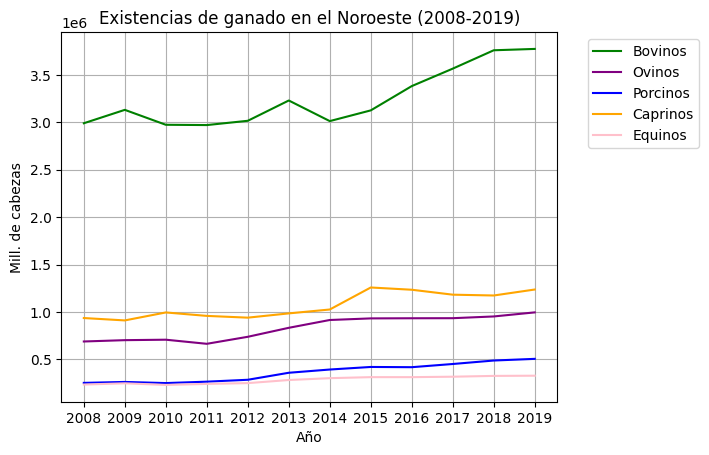

In [125]:
plt.plot(bovinos_noroeste['anio'], bovinos_noroeste['total_bovinos'], color='green', label='Bovinos')
plt.plot(ovinos_noroeste['anio'], ovinos_noroeste['total_ovinos'], color='purple', label='Ovinos')
plt.plot(porcinos_noroeste['anio'], porcinos_noroeste['total_porcinos'], color='blue', label='Porcinos')
plt.plot(caprinos_noroeste['anio'], caprinos_noroeste['total_caprinos'], color='orange', label='Caprinos')
plt.plot(equinos_noroeste['anio'], equinos_noroeste['total_equinos'], color='pink', label='Equinos')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Mill. de cabezas')
plt.title('Existencias de ganado en el Noroeste (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_noroeste - fig 4.4.jpg', bbox_inches='tight')
plt.show()

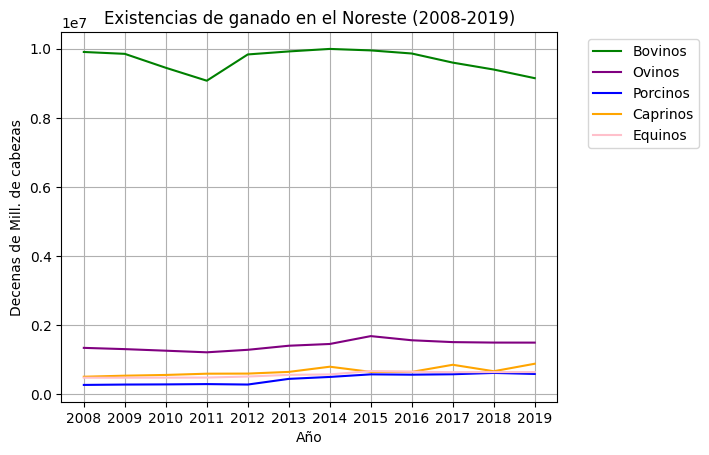

In [126]:
plt.plot(bovinos_noreste['anio'], bovinos_noreste['total_bovinos'], color='green', label='Bovinos')
plt.plot(ovinos_noreste['anio'], ovinos_noreste['total_ovinos'], color='purple', label='Ovinos')
plt.plot(porcinos_noreste['anio'], porcinos_noreste['total_porcinos'], color='blue', label='Porcinos')
plt.plot(caprinos_noreste['anio'], caprinos_noreste['total_caprinos'], color='orange', label='Caprinos')
plt.plot(equinos_noreste['anio'], equinos_noreste['total_equinos'], color='pink', label='Equinos')
plt.xticks(range(2008, 2020))
plt.xlabel('Año')
plt.ylabel('Decenas de Mill. de cabezas')
plt.title('Existencias de ganado en el Noreste (2008-2019)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid()
plt.savefig('existencias_noreste - fig 4.5.jpg', bbox_inches='tight')
plt.show()

4. Habiendo identificado en que regiones está más desarrollado cada tipo de ganado, se procede a graficar las existencias los mismos en el último año disponible en el dataset (2019), segmentando por provincia.

In [127]:
# Se generan sub-dataframes adecuados para el trabajo a realizar

provincias_porcinos = ex_porcinas_region[ex_porcinas_region['provincia'].isin(Pampeana)].reset_index(drop=True)
provincias_equinos = ex_equinas_region[ex_equinas_region['provincia'].isin(Pampeana)].reset_index(drop=True)
provincias_bovinos = ex_bovinas_region[ex_bovinas_region['provincia'].isin(Pampeana)].reset_index(drop=True)
provincias_ovinos = ex_ovinas_region[ex_ovinas_region['provincia'].isin(Patagonia)].reset_index(drop=True)
provincias_caprinos = ex_caprinas_region[ex_caprinas_region['provincia'].isin(Noroeste)].reset_index(drop=True)

In [128]:
# Se eliminan columnas no necesarias para el gráfico por provincia

dropindex_porc = [2,3,4,5,6,7,8,9,10,11]
dropindex_bov = [2,3,4,5,6,7,8,9,10,11,12,13]
dropindex_equi = [2,3,4,5,6,7,8,9,10]
dropindex_ovi = [2,3,4,5,6,7,8,9]
dropindex_cap = [2,3,4,5,6,7,8,9]

In [129]:
provincias_porcinos_1 =  provincias_porcinos.drop(provincias_porcinos.columns[dropindex_porc], axis=1)
provincias_equinos_1 =  provincias_equinos.drop(provincias_equinos.columns[dropindex_equi], axis=1)
provincias_bovinos_1 =  provincias_bovinos.drop(provincias_bovinos.columns[dropindex_bov], axis=1)
provincias_ovinos_1 =  provincias_ovinos.drop(provincias_ovinos.columns[dropindex_ovi], axis=1)
provincias_caprinos_1 =  provincias_caprinos.drop(provincias_caprinos.columns[dropindex_cap], axis=1)

In [130]:
# Se continúa limpiando los dataframes, dejando ahora solo el año 2019

provincias_caprinos_1_2019 =  provincias_caprinos_1[provincias_caprinos_1['anio'] == 2019]
provincias_ovinos_1_2019 =  provincias_ovinos_1[provincias_ovinos_1['anio'] == 2019]
provincias_bovinos_1_2019 =  provincias_bovinos_1[provincias_bovinos_1['anio'] == 2019]
provincias_equinos_1_2019 =  provincias_equinos_1[provincias_equinos_1['anio'] == 2019]
provincias_porcinos_1_2019 =  provincias_porcinos_1[provincias_porcinos_1['anio'] == 2019]

In [131]:
# Por último, se agrupa por año y pronvincia, sumando para cada fila resultante el total de existencia en cuestión

provincias_equinos_1_2019 = provincias_equinos_1_2019.groupby(['anio','provincia'], as_index=False)['total_equinos'].sum()
provincias_ovinos_1_2019 = provincias_ovinos_1_2019.groupby(['anio','provincia'], as_index=False)['total_ovinos'].sum()
provincias_bovinos_1_2019 = provincias_bovinos_1_2019.groupby(['anio','provincia'], as_index=False)['total_bovinos'].sum()
provincias_caprinos_1_2019 = provincias_caprinos_1_2019.groupby(['anio','provincia'], as_index=False)['total_caprinos'].sum()
provincias_porcinos_1_2019 = provincias_porcinos_1_2019.groupby(['anio','provincia'], as_index=False)['total_porcinos'].sum()


In [132]:
provincias_bovinos_1_2019 = provincias_bovinos_1_2019.sort_values('total_bovinos', ascending=False).reset_index(drop=True)
provincias_ovinos_1_2019 = provincias_ovinos_1_2019.sort_values('total_ovinos', ascending=False).reset_index(drop=True)
provincias_porcinos_1_2019 = provincias_porcinos_1_2019.sort_values('total_porcinos', ascending=False).reset_index(drop=True)
provincias_caprinos_1_2019 = provincias_caprinos_1_2019.sort_values('total_caprinos', ascending=False).reset_index(drop=True)
provincias_equinos_1_2019 = provincias_equinos_1_2019.sort_values('total_equinos', ascending=False).reset_index(drop=True)

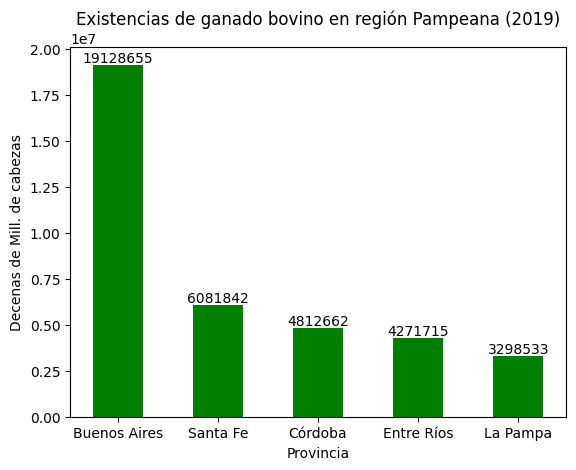

In [133]:
# Se generan los gráficos de barras

plt.bar(provincias_bovinos_1_2019.provincia, provincias_bovinos_1_2019.total_bovinos, width=0.5, color='green')
plt.title('Existencias de ganado bovino en región Pampeana (2019)')
plt.xlabel('Provincia')
plt.ylabel('Decenas de Mill. de cabezas')

for i, value in enumerate(provincias_bovinos_1_2019.total_bovinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('ex_bov_prov - fig 5.1a.jpg', bbox_inches='tight')
plt.show()

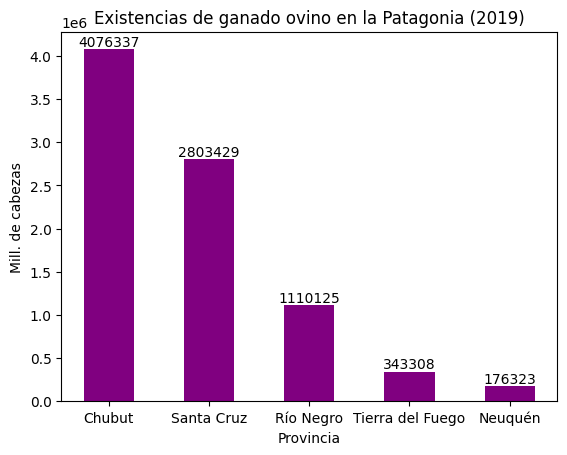

In [134]:
plt.bar(provincias_ovinos_1_2019.provincia, provincias_ovinos_1_2019.total_ovinos, width=0.5, color='purple')
plt.title('Existencias de ganado ovino en la Patagonia (2019)')
plt.xlabel('Provincia')
plt.ylabel('Mill. de cabezas')

for i, value in enumerate(provincias_ovinos_1_2019.total_ovinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('ex_ovi_prov - fig 5.1b.jpg', bbox_inches='tight')
plt.show()

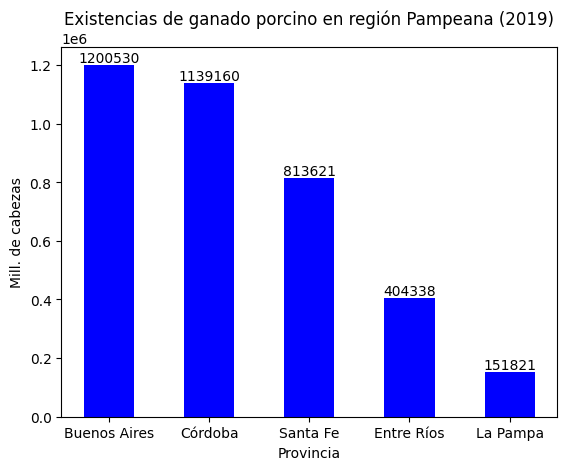

In [135]:
plt.bar(provincias_porcinos_1_2019.provincia, provincias_porcinos_1_2019.total_porcinos, width=0.5, color='blue')
plt.title('Existencias de ganado porcino en región Pampeana (2019)')
plt.xlabel('Provincia')
plt.ylabel('Mill. de cabezas')

for i, value in enumerate(provincias_porcinos_1_2019.total_porcinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('ex_porc_prov - fig 5.1c.jpg', bbox_inches='tight') 
plt.show()

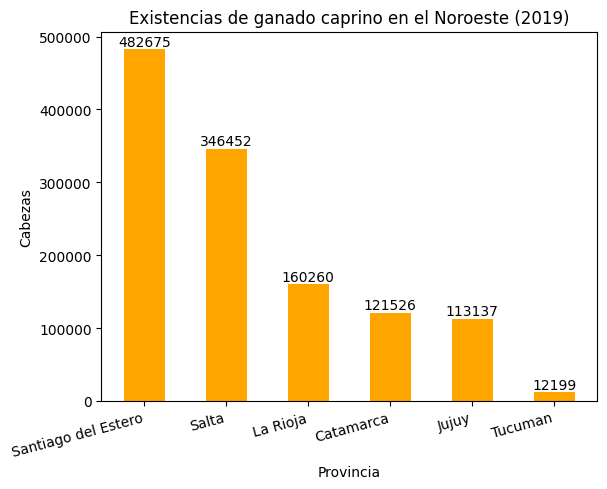

In [136]:
plt.bar(provincias_caprinos_1_2019.provincia, provincias_caprinos_1_2019.total_caprinos, width=0.5, color='orange')
plt.title('Existencias de ganado caprino en el Noroeste (2019)')
plt.xlabel('Provincia')
plt.xticks(rotation=15, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(provincias_caprinos_1_2019.total_caprinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('ex_cap_prov - fig 5.1d.jpg', bbox_inches='tight')
plt.show()

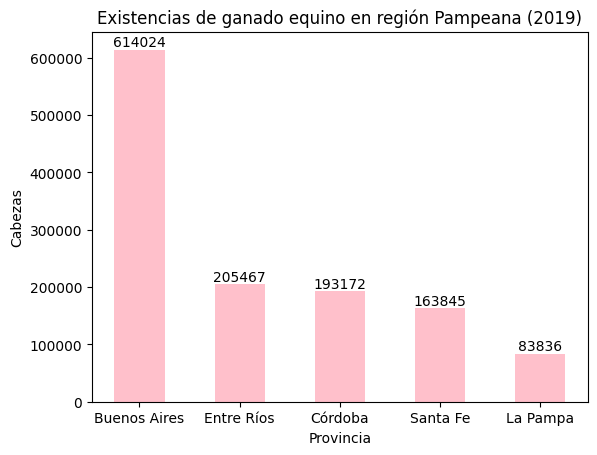

In [137]:
plt.bar(provincias_equinos_1_2019.provincia, provincias_equinos_1_2019.total_equinos, width=0.5, color='pink')
plt.title('Existencias de ganado equino en región Pampeana (2019)')
plt.xlabel('Provincia')
plt.ylabel('Cabezas')

for i, value in enumerate(provincias_equinos_1_2019.total_equinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('ex_equ_prov - fig 5.1e.jpg', bbox_inches='tight')
plt.show()

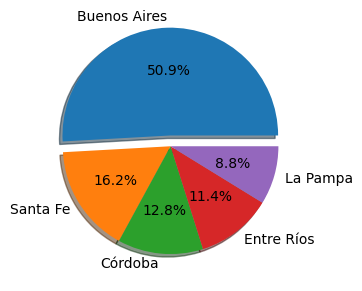

In [138]:
# Generación de los gráficos de torta

# bovinos:

plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0]
plt.pie(provincias_bovinos_1_2019.total_bovinos, labels=provincias_bovinos_1_2019.provincia, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('ex_bov_prov - fig 5.2a.jpg', bbox_inches='tight')
plt.show()

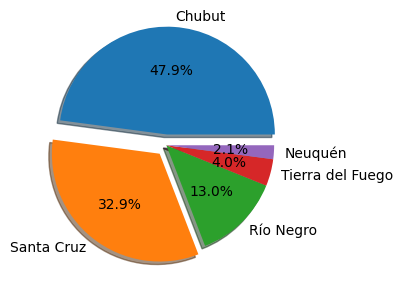

In [139]:
# ovinos:

plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0.1,0,0,0]
plt.pie(provincias_ovinos_1_2019.total_ovinos, labels=provincias_ovinos_1_2019.provincia, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('ex_ovi_prov - fig 5.2b.jpg', bbox_inches='tight')
plt.show()

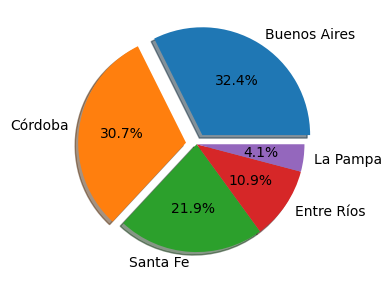

In [140]:
# porcino

plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0.1,0,0,0]
plt.pie(provincias_porcinos_1_2019.total_porcinos, labels=provincias_porcinos_1_2019.provincia, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('ex_porc_prov - fig 5.2c.jpg', bbox_inches='tight')
plt.show()

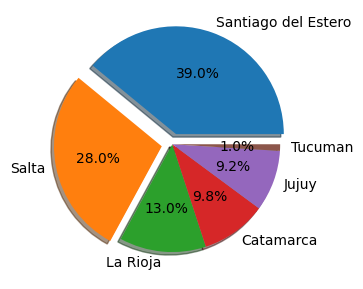

In [141]:
# caprino

plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0.1,0,0,0,0]
plt.pie(provincias_caprinos_1_2019.total_caprinos, labels=provincias_caprinos_1_2019.provincia, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('ex_cap_prov - fig 5.2d.jpg', bbox_inches='tight')
plt.show()

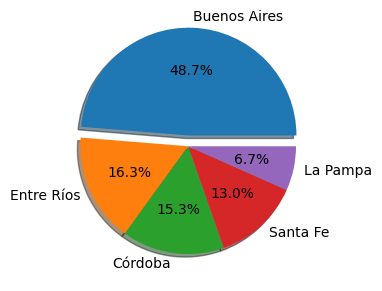

In [142]:
# equinos

plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0]
plt.pie(provincias_equinos_1_2019.total_equinos, labels=provincias_equinos_1_2019.provincia, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('ex_equ_prov - fig 5.2e.jpg', bbox_inches='tight')
plt.show()

5. Identificada las provincias con mayor producción de cada región, para el ganado predominante en la misma, se generan gráficos segmentados por departamento, a fin de visualizar e identificar los principales productores de la provincia en el año 2019.

In [143]:
# se generan sub-dataframes para obtener los datos buscados

porcinos_bsas = ex_porcinas_region[ex_porcinas_region['provincia'] == 'Buenos Aires'].reset_index(drop=True)
porcinos_cba = ex_porcinas_region[ex_porcinas_region['provincia'] == 'Córdoba'].reset_index(drop=True)
equinos_bsas = ex_equinas_region[ex_equinas_region['provincia'] == 'Buenos Aires'].reset_index(drop=True)
caprinos_stgo = ex_caprinas_region[ex_caprinas_region['provincia'] == 'Santiago del Estero'].reset_index(drop=True)
caprinos_salta = ex_caprinas_region[ex_caprinas_region['provincia'] == 'Salta'].reset_index(drop=True)
ovinos_chubut = ex_ovinas_region[ex_ovinas_region['provincia'] == 'Chubut'].reset_index(drop=True)
ovinos_scruz = ex_ovinas_region[ex_ovinas_region['provincia'] == 'Santa Cruz'].reset_index(drop=True)
bovinos_bsas = ex_bovinas_region[ex_bovinas_region['provincia'] == 'Buenos Aires'].reset_index(drop=True)

In [144]:
porcinos_bsas_2019 = porcinos_bsas[porcinos_bsas['anio'] == 2019].reset_index(drop=True)
porcinos_cba_2019 = porcinos_cba[porcinos_cba['anio'] == 2019].reset_index(drop=True)
equinos_bsas_2019 = equinos_bsas[equinos_bsas['anio'] == 2019].reset_index(drop=True)
caprinos_stgo_2019 = caprinos_stgo[caprinos_stgo['anio'] == 2019].reset_index(drop=True)
caprinos_salta_2019 = caprinos_salta[caprinos_salta['anio'] == 2019].reset_index(drop=True)
ovinos_chubut_2019 = ovinos_chubut[ovinos_chubut['anio'] == 2019].reset_index(drop=True)
ovinos_scruz_2019 = ovinos_scruz[ovinos_scruz['anio'] == 2019].reset_index(drop=True)
bovinos_bsas_2019 = bovinos_bsas[bovinos_bsas['anio'] == 2019].reset_index(drop=True)

In [145]:
dropindex_porc_2 = [1,2,4,5,6,7,8,9,10,11]
dropindex_equ_2 = [1,2,4,5,6,7,8,9,10]
dropindex_cap_2 = [1,2,4,5,6,7,8,9]
dropindex_ovi_2 = [1,2,4,5,6,7,8,9]
dropindex_bov_2 = [1,2,4,5,6,7,8,9,10,11,12,13]

In [146]:
porcinos_bsas_2019_2 = porcinos_bsas_2019.drop(porcinos_bsas_2019.columns[dropindex_porc_2], axis=1)
porcinos_cba_2019_2 = porcinos_cba_2019.drop(porcinos_cba_2019.columns[dropindex_porc_2], axis=1)
equinos_bsas_2019_2 = equinos_bsas_2019.drop(equinos_bsas_2019.columns[dropindex_equ_2], axis=1)
caprinos_stgo_2019_2 = caprinos_stgo_2019.drop(caprinos_stgo_2019.columns[dropindex_cap_2], axis=1)
caprinos_salta_2019_2 = caprinos_salta_2019.drop(caprinos_salta_2019.columns[dropindex_cap_2], axis=1)
ovinos_chubut_2019_2 = ovinos_chubut_2019.drop(ovinos_chubut_2019.columns[dropindex_ovi_2], axis=1)
ovinos_scruz_2019_2 = ovinos_scruz_2019.drop(ovinos_scruz_2019.columns[dropindex_ovi_2], axis=1)
bovinos_bsas_2019_2 = bovinos_bsas_2019.drop(bovinos_bsas_2019.columns[dropindex_bov_2], axis=1)

In [147]:
porcinos_bsas_2019_2g = porcinos_bsas_2019_2.groupby(['anio','departamento'], as_index=False)['total_porcinos'].sum().sort_values('total_porcinos', ascending=False).reset_index(drop=True)
porcinos_cba_2019_2g = porcinos_cba_2019_2.groupby(['anio','departamento'], as_index=False)['total_porcinos'].sum().sort_values('total_porcinos', ascending=False).reset_index(drop=True)
equinos_bsas_2019_2g = equinos_bsas_2019_2.groupby(['anio','departamento'], as_index=False)['total_equinos'].sum().sort_values('total_equinos', ascending=False).reset_index(drop=True)
caprinos_stgo_2019_2g = caprinos_stgo_2019_2.groupby(['anio','departamento'], as_index=False)['total_caprinos'].sum().sort_values('total_caprinos', ascending=False).reset_index(drop=True)
caprinos_salta_2019_2g = caprinos_salta_2019_2.groupby(['anio','departamento'], as_index=False)['total_caprinos'].sum().sort_values('total_caprinos', ascending=False).reset_index(drop=True)
ovinos_chubut_2019_2g = ovinos_chubut_2019_2.groupby(['anio','departamento'], as_index=False)['total_ovinos'].sum().sort_values('total_ovinos', ascending=False).reset_index(drop=True)
ovinos_scruz_2019_2g = ovinos_scruz_2019_2.groupby(['anio','departamento'], as_index=False)['total_ovinos'].sum().sort_values('total_ovinos', ascending=False).reset_index(drop=True)
bovinos_bsas_2019_2g = bovinos_bsas_2019_2.groupby(['anio','departamento'], as_index=False)['total_bovinos'].sum().sort_values('total_bovinos', ascending=False).reset_index(drop=True)

In [148]:
# Para graficar, consideraremos los 8 departamentos de mayor producción de cada provincia (Top 8)

porcinos_bsas_2019_2g_top8 = porcinos_bsas_2019_2g.head(8)
porcinos_cba_2019_2g_top8 =  porcinos_cba_2019_2g.head(8)
equinos_bsas_2019_2g_top8 = equinos_bsas_2019_2g.head(8)
caprinos_stgo_2019_2g_top8 = caprinos_stgo_2019_2g.head(8)
caprinos_salta_2019_2g_top8 = caprinos_salta_2019_2g.head(8)
ovinos_chubut_2019_2g_top8 = ovinos_chubut_2019_2g.head(8)
ovinos_scruz_2019_2g_top7 =  ovinos_scruz_2019_2g.head(7)
bovinos_bsas_2019_2g_top8 = bovinos_bsas_2019_2g.head(8)

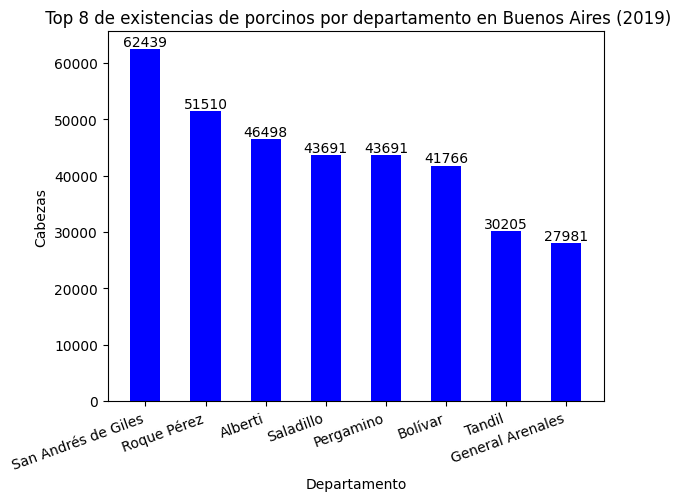

In [149]:
plt.bar(porcinos_bsas_2019_2g_top8.departamento, porcinos_bsas_2019_2g_top8.total_porcinos, width=0.5, color='blue')
plt.title(' Top 8 de existencias de porcinos por departamento en Buenos Aires (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(porcinos_bsas_2019_2g_top8.total_porcinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('bsas_top8_porc - fig 6.1a.jpg', bbox_inches='tight')
plt.show()

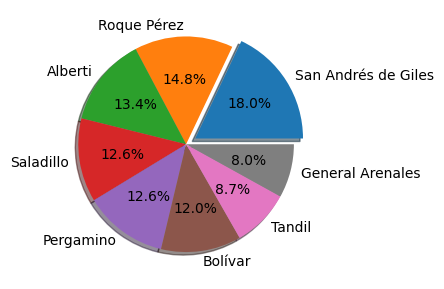

In [150]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(porcinos_bsas_2019_2g_top8.total_porcinos, labels=porcinos_bsas_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('bsas_top8_porc - fig 6.1ap.jpg', bbox_inches='tight')
plt.show()

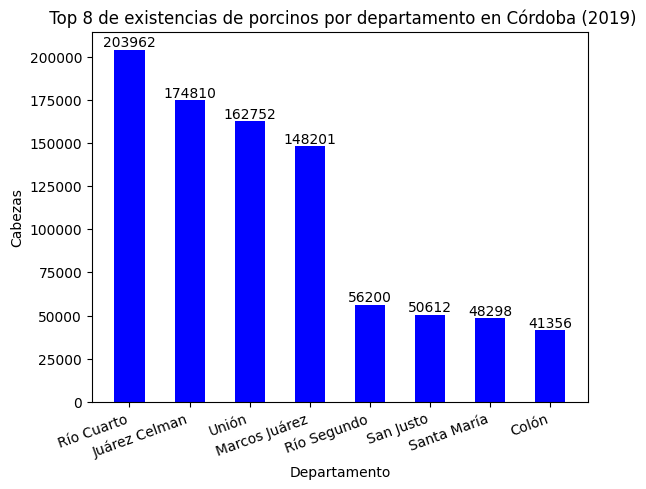

In [151]:
plt.bar(porcinos_cba_2019_2g_top8.departamento, porcinos_cba_2019_2g_top8.total_porcinos, width=0.5, color='blue')
plt.title(' Top 8 de existencias de porcinos por departamento en Córdoba (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(porcinos_cba_2019_2g_top8.total_porcinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('cba_top8_porc - fig 6.1b.jpg', bbox_inches='tight')
plt.show()

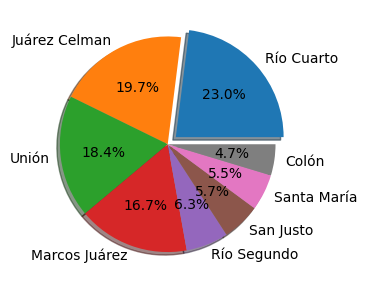

In [152]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(porcinos_cba_2019_2g_top8.total_porcinos, labels=porcinos_cba_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('cba_top8_porc - fig 6.1bp.jpg', bbox_inches='tight')
plt.show()

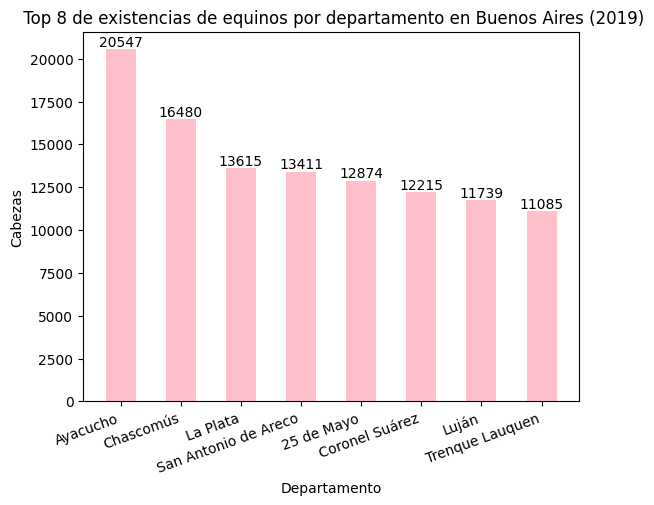

In [153]:
plt.bar(equinos_bsas_2019_2g_top8.departamento, equinos_bsas_2019_2g_top8.total_equinos, width=0.5, color='pink')
plt.title(' Top 8 de existencias de equinos por departamento en Buenos Aires (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(equinos_bsas_2019_2g_top8.total_equinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('bsas_top8_equ - fig 6.2.jpg', bbox_inches='tight')
plt.show()

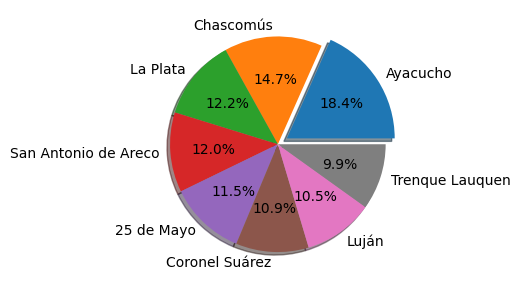

In [154]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(equinos_bsas_2019_2g_top8.total_equinos, labels=equinos_bsas_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('bsas_top8_equ - fig 6.2p.jpg', bbox_inches='tight')
plt.show()

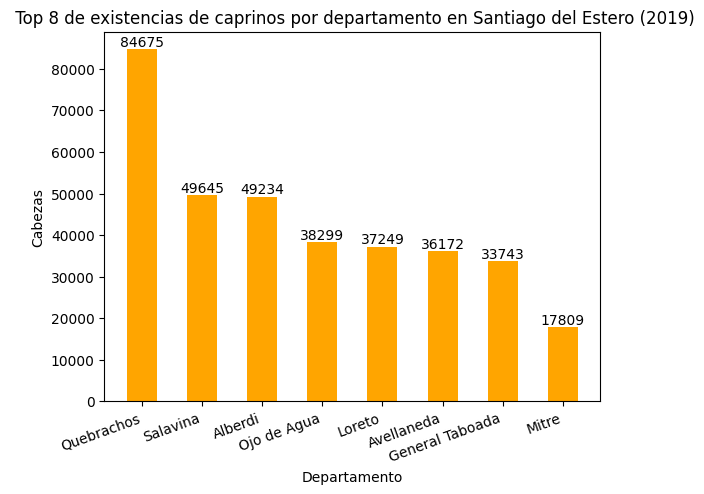

In [155]:
plt.bar(caprinos_stgo_2019_2g_top8.departamento, caprinos_stgo_2019_2g_top8.total_caprinos, width=0.5, color='orange')
plt.title(' Top 8 de existencias de caprinos por departamento en Santiago del Estero (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(caprinos_stgo_2019_2g_top8.total_caprinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('stgo_top8_cap - fig 6.3a.jpg', bbox_inches='tight')
plt.show()

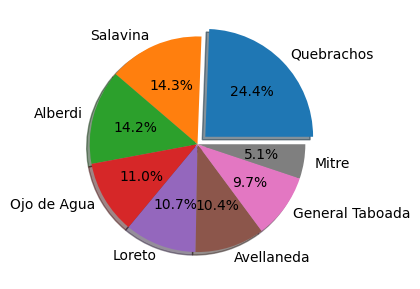

In [156]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(caprinos_stgo_2019_2g_top8.total_caprinos, labels=caprinos_stgo_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('stgo_top8_cap - fig 6.3ap.jpg', bbox_inches='tight')
plt.show()

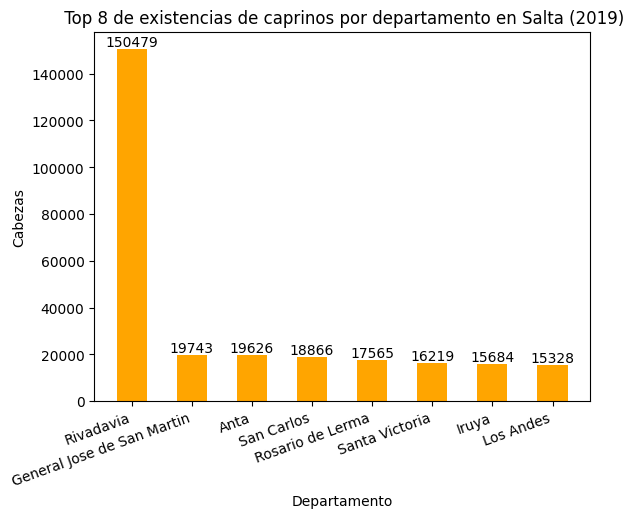

In [157]:
plt.bar(caprinos_salta_2019_2g_top8.departamento, caprinos_salta_2019_2g_top8.total_caprinos, width=0.5, color='orange')
plt.title(' Top 8 de existencias de caprinos por departamento en Salta (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(caprinos_salta_2019_2g_top8.total_caprinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('salta_top8_cap - fig 6.3b.jpg', bbox_inches='tight')
plt.show()

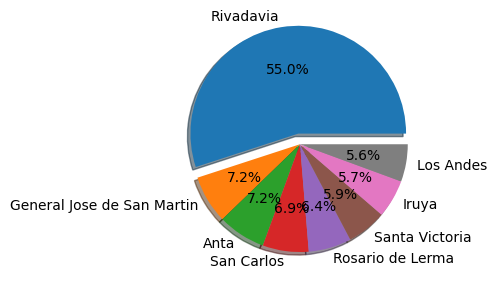

In [158]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(caprinos_salta_2019_2g_top8.total_caprinos, labels=caprinos_salta_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('salta_top8_cap - fig 6.3bp.jpg', bbox_inches='tight')
plt.show()

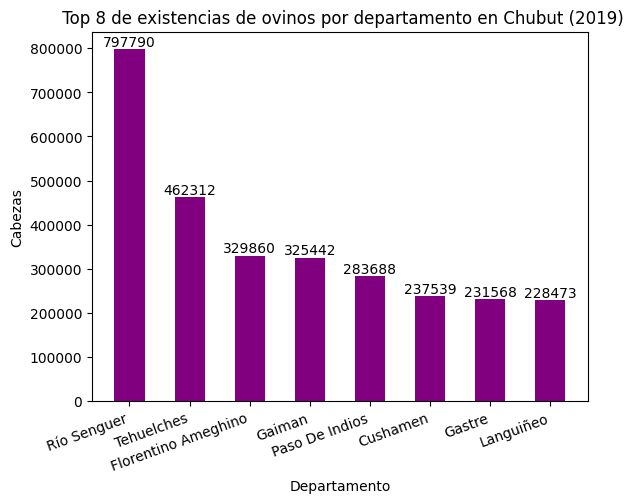

In [159]:
plt.bar(ovinos_chubut_2019_2g_top8.departamento, ovinos_chubut_2019_2g_top8.total_ovinos, width=0.5, color='purple')
plt.title(' Top 8 de existencias de ovinos por departamento en Chubut (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(ovinos_chubut_2019_2g_top8.total_ovinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('chubut_top8_ovi - fig 6.4a.jpg', bbox_inches='tight')
plt.show()

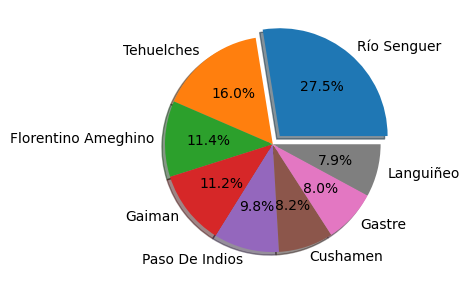

In [160]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(ovinos_chubut_2019_2g_top8.total_ovinos, labels=ovinos_chubut_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('chubut_top8_ovi - fig 6.4ap.jpg', bbox_inches='tight')
plt.show()

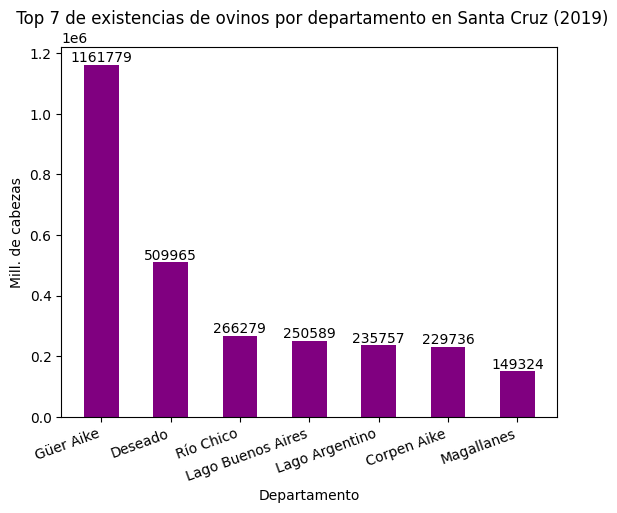

In [161]:
plt.bar(ovinos_scruz_2019_2g_top7.departamento, ovinos_scruz_2019_2g_top7.total_ovinos, width=0.5, color='purple')
plt.title(' Top 7 de existencias de ovinos por departamento en Santa Cruz (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Mill. de cabezas')

for i, value in enumerate(ovinos_scruz_2019_2g_top7.total_ovinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

#plt.savefig('scruz_top7_ovi - fig 6.4b.jpg', bbox_inches='tight')
plt.show()

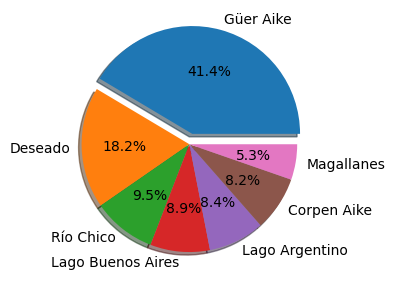

In [162]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0]
plt.pie(ovinos_scruz_2019_2g_top7.total_ovinos, labels=ovinos_scruz_2019_2g_top7.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('scruz_top7_ovi - fig 6.4bp.jpg', bbox_inches='tight')
plt.show()

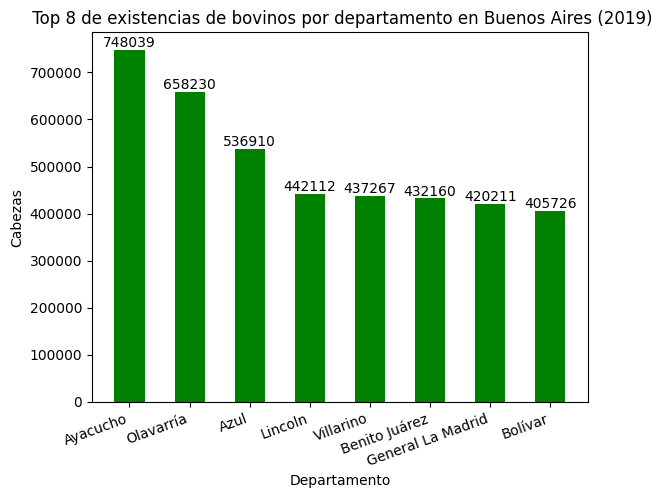

In [163]:
plt.bar(bovinos_bsas_2019_2g_top8.departamento, bovinos_bsas_2019_2g_top8.total_bovinos, width=0.5, color='green')
plt.title(' Top 8 de existencias de bovinos por departamento en Buenos Aires (2019)')
plt.xlabel('Departamento')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Cabezas')

for i, value in enumerate(bovinos_bsas_2019_2g_top8.total_bovinos):
    plt.text(i, value, str(value), ha='center', va='bottom')

# plt.savefig('bsas_top8_bov - fig 6.5.jpg', bbox_inches='tight')
plt.show()

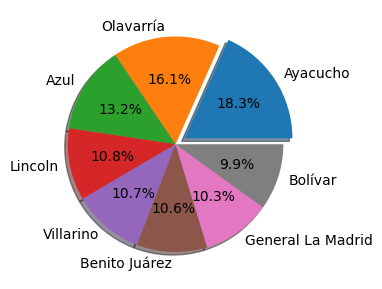

In [164]:
plt.figure(figsize=(3.5,3.5))
explodeProv=[0.1,0,0,0,0,0,0,0]
plt.pie(bovinos_bsas_2019_2g_top8.total_bovinos, labels=bovinos_bsas_2019_2g_top8.departamento, explode=explodeProv, shadow=True, autopct='%1.1f%%', startangle=0)
# plt.savefig('bsas_top8_bovi - fig 6.5p.jpg', bbox_inches='tight')
plt.show()